# How to Succeed at Speed Dating <br>Without Really Trying 

<img src="speed_dating_art.jpg" alt="Drawing" style="width: 400px; height:200px">

## Unit 3 Data Science Capstone <br> by Vincent Gomez


[Speed Dating on Kaggle](https://www.kaggle.com/annavictoria/speed-dating-experiment)  (Montoya, A. 2015)

Columbia Business School professors Ray Fisman and Sheena Iyengar.


21 experimental speed dating events from 2002-2004 

Four minute "first dates" 

<img src="Four_Minute_Timer.png"alt="Drawing" style="width: 200px">


Available Data:

Attribute Scores- Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests

Importance Scores for each attribute

Precieved Importance Scores of the opposite sex

Self-perceived scores for each attribute

Demographics- age, race, location, career field/major 

Dating habits- how often

Lifestyle information- hobbies and interests

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from matplotlib.gridspec import GridSpec
import textwrap
from sklearn import ensemble
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
speed_dating_download = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

In [3]:
speed_dating = speed_dating_download.copy()

In [4]:
speed_dating2 = speed_dating_download.copy()

In [5]:
speed_dating['gender'] = speed_dating['gender'].map({0:'Female', 1:'Male'})
speed_dating['length'] = speed_dating['length'].map({1:'Too Short', 2:'Too Long', 3:'Just Right'})
speed_dating['numdat_2'] = speed_dating['numdat_2'].map({1:'Too Few', 2:'Too Many', 3:'Just Enough'})
speed_dating['race'] = speed_dating['race'].map({1:'Black', 2:'White', 3:'Latino', 4:'Asian', 5:'Native American', 6:'Other'})
speed_dating['goal'] = speed_dating['goal'].map({1:'Seemed like a fun night out', 2:'To meet new people',
                                                3:'To get a date', 4:'Looking for a serious relationship',
                                                5:'To say I did it', 6:'Other'})

In [6]:
data = speed_dating.groupby(['iid']).first()

The population...

There were 551 participants.
274 women and 277 men.


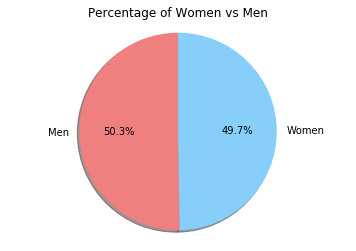

Each person met 10-20 potential matches - 4184 speed dates.


In [7]:
women_data = speed_dating[speed_dating.gender == 'Female']
men_data = speed_dating[speed_dating.gender == 'Male']

print('There were {} participants.\n{} women and {} men.'.format(speed_dating.iid.nunique(),
                                                               women_data.iid.nunique(),
                                                               men_data.iid.nunique()))
# Data to plot
labels = 'Men', 'Women'
sizes = [men_data.iid.nunique() , women_data.iid.nunique()]
colors = ['lightcoral', 'lightskyblue']
explode = ( 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of Women vs Men')
plt.axis('equal')
plt.show()

print('Each person met 10-20 potential matches - {} speed dates.'.format(women_data.shape[0]))

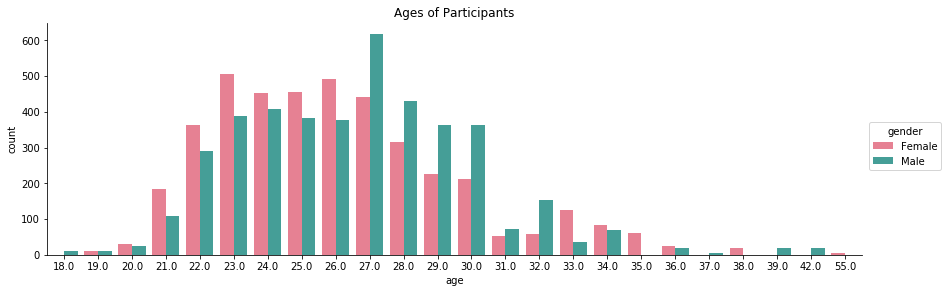

In [8]:
sns.factorplot(x="age", hue='gender', data=speed_dating, 
               kind='count',size=4, aspect=3, palette="husl")
plt.title('Ages of Participants')
plt.show()

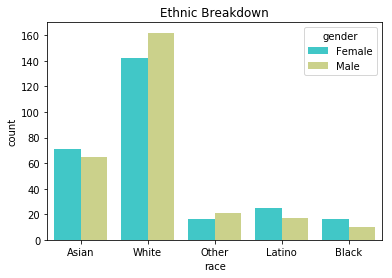

In [9]:
sns.countplot(x="race", data=data, hue='gender', palette="rainbow")
plt.title('Ethnic Breakdown')
plt.show()


There were over 200 different majors. These were the top 20 most popular ones...


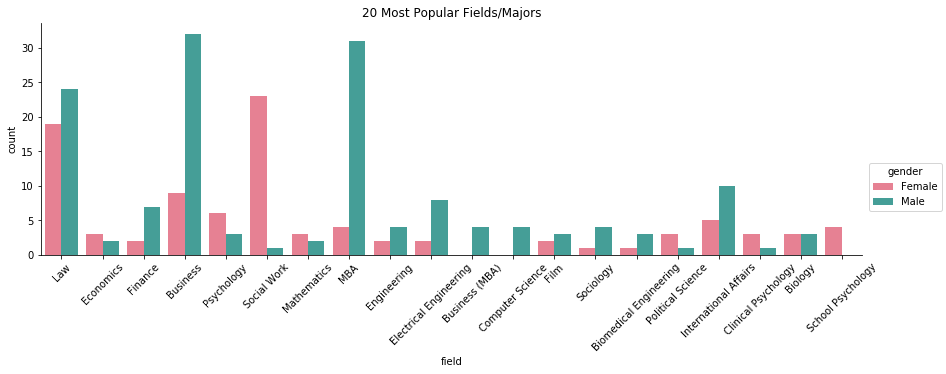

In [10]:
print("There were over 200 different majors. These were the top 20 most popular ones...")

data = speed_dating.groupby(['iid']).first()

data['field'] = data['field'].replace('business', 'Business').replace('law','Law')

top_10_fields = data.field.value_counts().head(n=20)

top_10_fields = data.loc[data.field.isin(list(top_10_fields.index)), :]

g = sns.factorplot(x="field", hue='gender', data=top_10_fields, 
               kind='count',size=4, aspect=3, palette="husl")
g.set_xticklabels(rotation=45)
plt.title('20 Most Popular Fields/Majors')
plt.show()


Key Questions:

What is the most important attribute in getting that first date?

Is there a difference in what men and women find important in a partner?

How can I make myself more 'marketable' in the dating scene?

My features:

The 6 attribute scores: Attraction, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The overall 'like' score.

Here is how the men and women scored each other on these 6 attributes...


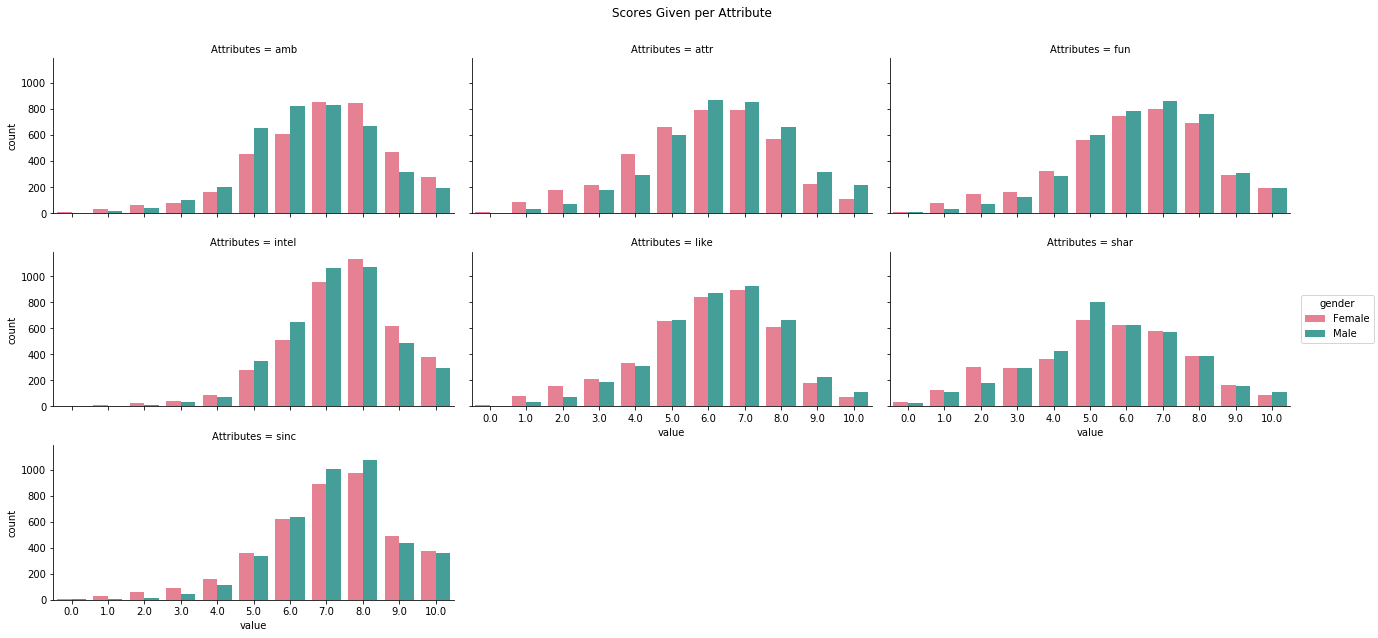

In [11]:
print('Here is how the men and women scored each other on these 6 attributes...')

experiment = speed_dating.loc[:,['iid','pid','gender', 'attr','amb','sinc','intel','fun','shar','like']]
experiment2 = pd.pivot_table(experiment,index=["iid",'gender', "pid"])
experiment2_stacked = experiment2.stack()
experiment2_stacked.index.set_names('Attributes', level=len(experiment2_stacked.index.names)-1, inplace=True)
experiment2_stacked = experiment2_stacked.reset_index().rename(columns={0:'value'})
experiment2_stacked = experiment2_stacked[experiment2_stacked['value']%1 == 0]
g = sns.factorplot(x="value", hue="gender", col="Attributes",
                   data=experiment2_stacked, kind="count",
                   size=3, aspect=2, col_wrap=3, palette='husl')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scores Given per Attribute')
plt.show()

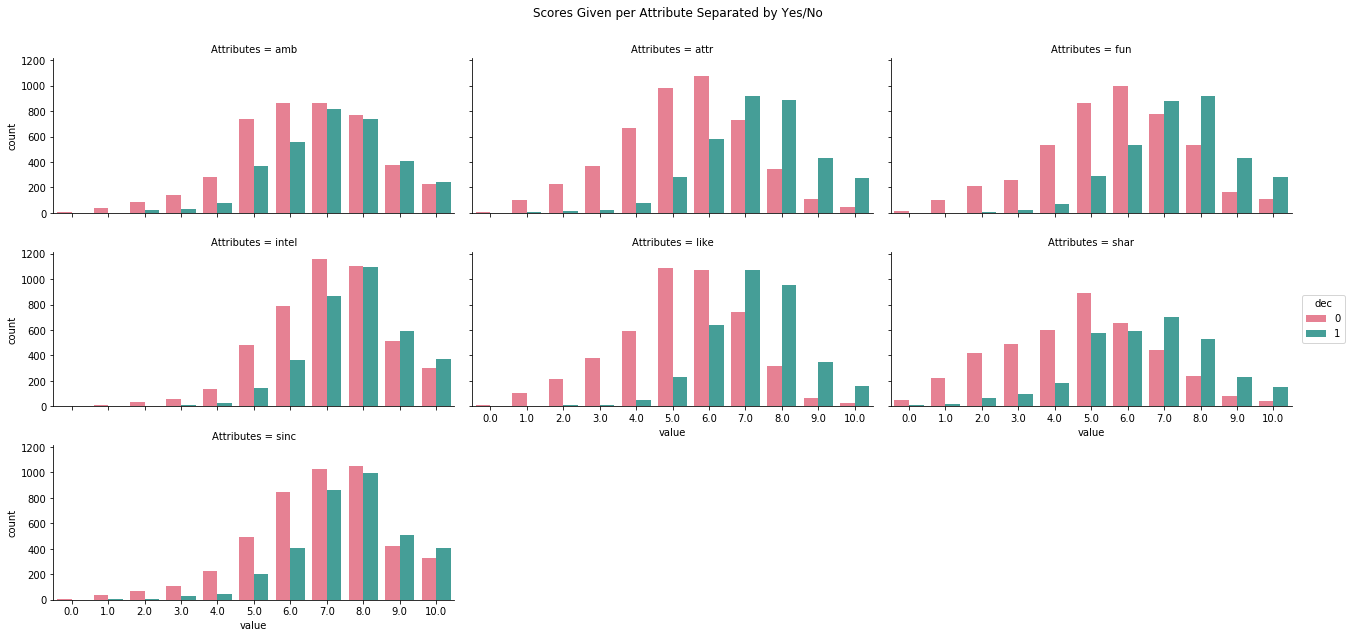

In [12]:
experiment = speed_dating.loc[:,['iid','pid','gender', 'attr','amb','sinc','intel','fun','shar','like','dec']]
experiment2 = pd.pivot_table(experiment,index=["iid",'gender', "pid",'dec'])
experiment2_stacked = experiment2.stack()
experiment2_stacked.index.set_names('Attributes', level=len(experiment2_stacked.index.names)-1, inplace=True)
experiment2_stacked = experiment2_stacked.reset_index().rename(columns={0:'value'})
experiment2_stacked = experiment2_stacked[experiment2_stacked['value']%1 == 0]
g = sns.factorplot(x="value", hue="dec", col="Attributes",
                   data=experiment2_stacked, kind="count",
                   size=3, aspect=2, col_wrap=3, palette='husl')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scores Given per Attribute Separated by Yes/No')
plt.show()

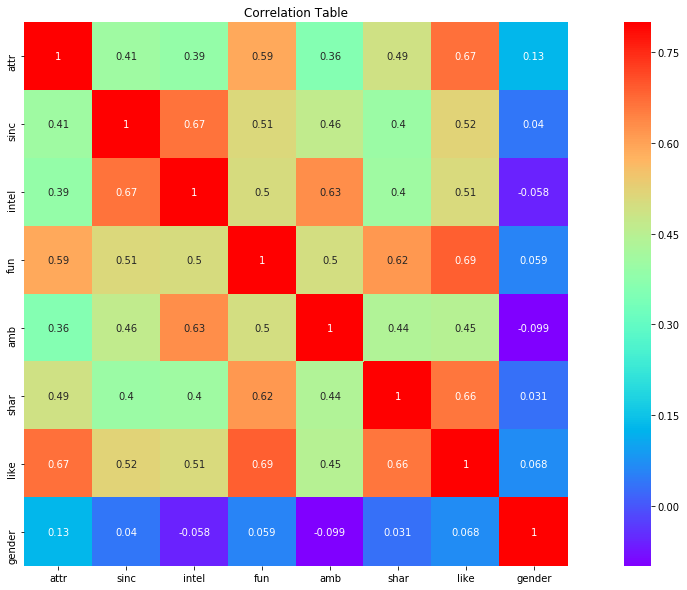

In [13]:
speed_dating1 = speed_dating2[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
speed_dating1_rankings = speed_dating1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(speed_dating1_rankings, vmax=.8, square=True, annot=True, cmap = 'rainbow')
plt.title('Correlation Table')
plt.show()

Accuracy Result from Random Forest Classifier:
0.744539411206


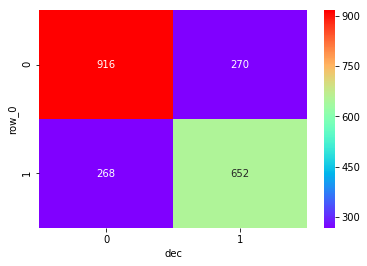

In [14]:
from sklearn.model_selection import train_test_split # to split the data into two parts

speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test
train, test = train_test_split(speed_dating1, test_size = 0.3)# in this our main data is splitted into train and test

print('Accuracy Result from Random Forest Classifier:')

from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.ensemble import RandomForestClassifier # for random forest classifier

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data

model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)

prediction = model.predict(test_X)

print(metrics.accuracy_score(prediction,test_y))

from sklearn.metrics import confusion_matrix

sns.heatmap(pd.crosstab(prediction,test_y), annot=True, fmt="d", cmap='rainbow')
plt.show()

Decision Tree


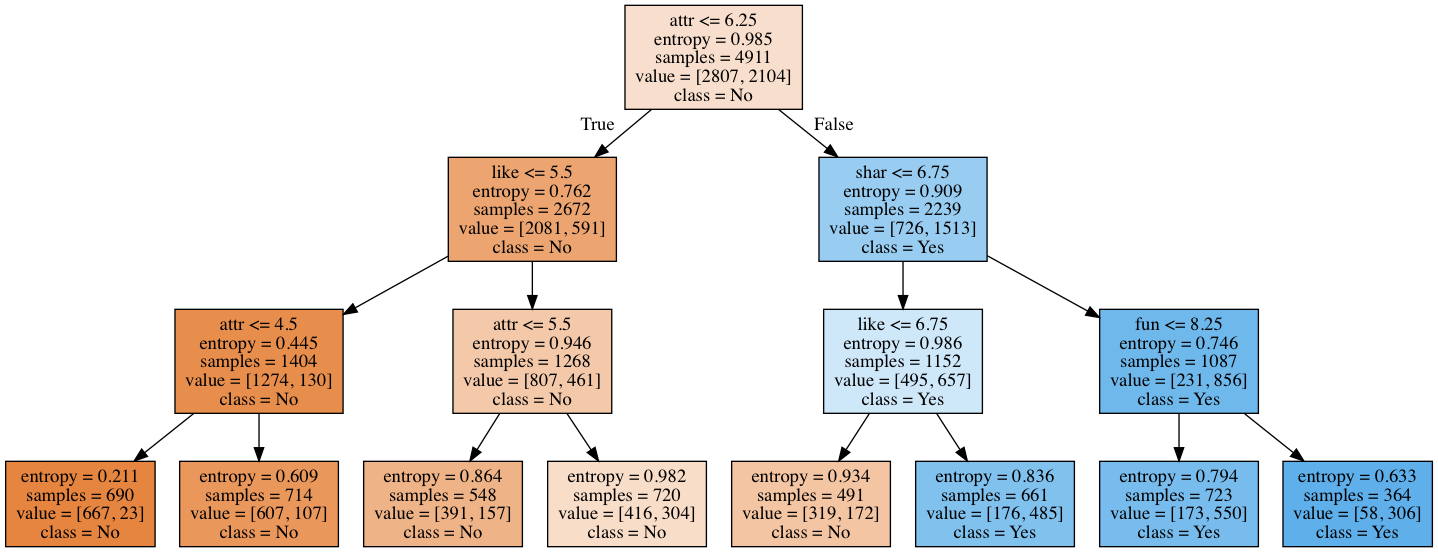

In [15]:
print('Decision Tree')

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=3,
)
decision_tree.fit(train_X,train_y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=train_X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

List of Feature Importance based off of Gradient Boosting Classifier:


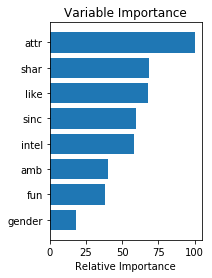

Accuracy score: 0.7739791073124407


In [16]:
print('List of Feature Importance based off of Gradient Boosting Classifier:')

from sklearn import ensemble

speed_dating2 = speed_dating_download.copy()


speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test

train, test = train_test_split(speed_dating1, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

prediction = clf.predict(test_X)
print('Accuracy score: {}'.format(metrics.accuracy_score(prediction,test_y)))

#### Regression: Beyond Yes/No
Advantages- 
-  Percentage of Yesses
-  Average Attribute scores

Disadvantages- 
-  Reduces sample size from 4,184 to 551
-  Averages are only based off of 10-20 scores 

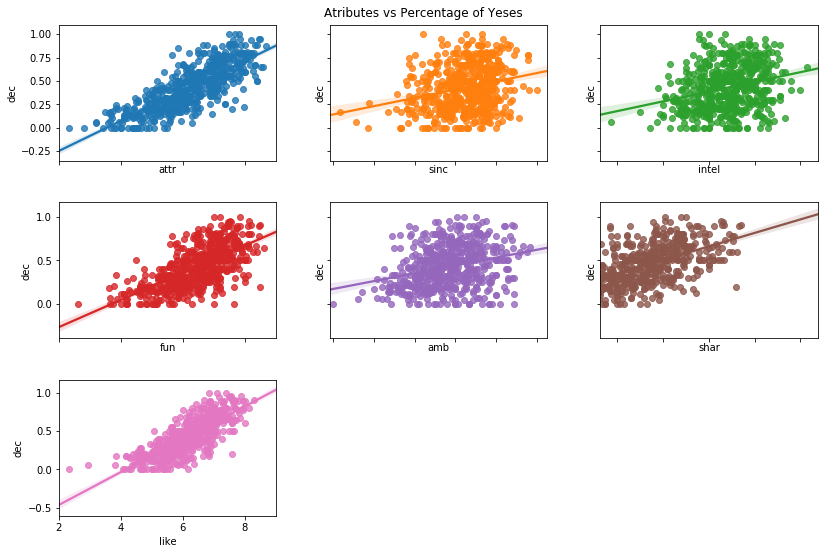

In [17]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','prob'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', sharey='row')
fig.tight_layout()
fig.set_size_inches(12, 8)
sns.regplot(x=score_averages.attr , y=score_averages.dec, ax=ax1)
sns.regplot(x=score_averages.sinc , y=score_averages.dec, ax=ax2)
sns.regplot(x=score_averages.intel , y=score_averages.dec, ax=ax3)
sns.regplot(x=score_averages.fun , y=score_averages.dec, ax=ax4)
sns.regplot(x=score_averages.amb , y=score_averages.dec, ax=ax5)
sns.regplot(x=score_averages.shar , y=score_averages.dec, ax=ax6)
sns.regplot(x=score_averages.like , y=score_averages.dec, ax=ax7)
fig.delaxes(ax8)
fig.delaxes(ax9)
fig.suptitle('Atributes vs Percentage of Yeses')

plt.show()

In [18]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','gender'].mean().dropna()

score_averages = score_averages.sample(frac=1)

linear_formula = 'dec ~ attr+sinc+intel+fun+amb+shar+like+gender'

min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(score_averages)
x = pd.DataFrame(x)

x.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','gender']

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=x).fit()

print('Ordinary Lease Square Regressor\nR-squared score: {}'.format(lm.rsquared))

print('\nP-values:')
print(lm.pvalues)

print('\nCoeficients:')
print(lm.params)

Ordinary Lease Square Regressor
R-squared score: 0.6950490441342894

P-values:
Intercept    4.273519e-19
attr         2.930680e-19
sinc         3.124815e-04
intel        6.650618e-01
fun          8.611022e-01
amb          7.244524e-01
shar         8.626392e-01
like         8.693716e-14
gender       2.869042e-02
dtype: float64

Coeficients:
Intercept   -0.300776
attr         0.525658
sinc        -0.204282
intel        0.029134
fun         -0.011841
amb         -0.019416
shar        -0.011532
like         0.828489
gender       0.027756
dtype: float64


Random Forest Regression R-Squared Score:
0.703896057099
Gradient Boost Regression R-Squared Score:
0.654793513028


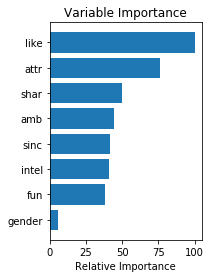

In [19]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','gender'].mean().dropna()

score_averages = score_averages.sample(frac=1)

train, test = train_test_split(score_averages, test_size = 0.3)

train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data



regr_rf = RandomForestRegressor(max_depth=4, random_state=2)
regr_rf.fit(train_X, train_y)

print('Random Forest Regression R-Squared Score:')
print(regr_rf.score(test_X, test_y))

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(train_X, train_y)

feature_importance = clf.feature_importances_

print('Gradient Boost Regression R-Squared Score:')
print(clf.score(test_X, test_y))

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

A regression with this Data Set doesn't seem like a good idea... 

Adding more features...

1\) Self Ratings

2\) Attribute Importance Ratings

On the day of the event, these are the results:


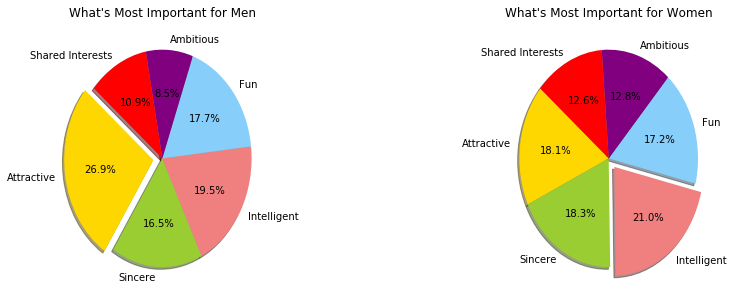

In [20]:
print('On the day of the event, these are the results:')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

attr_sum = men_data.attr1_1.sum()
sinc_sum = men_data.sinc1_1.sum()
intell_sum = men_data.intel1_1.sum()
fun_sum = men_data.fun1_1.sum()
amb_sum = men_data.amb1_1.sum()
shar_sum = men_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('What\'s Most Important for Men')
 
# plt.axis('equal')

attr_sum = women_data.attr1_1.sum()
sinc_sum = women_data.sinc1_1.sum()
intell_sum = women_data.intel1_1.sum()
fun_sum = women_data.fun1_1.sum()
amb_sum = women_data.amb1_1.sum()
shar_sum = women_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0, 0, 0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
ax2.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('What\'s Most Important for Women')
 
# plt.axis('equal')
fig.subplots_adjust(wspace=1)
plt.show()

When asked in the days following the event, however, there were a few changes...


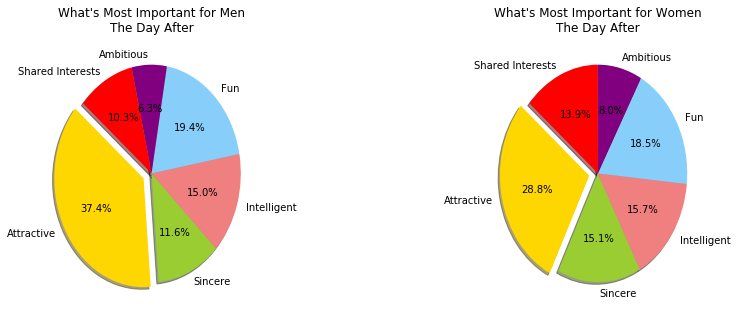

In [21]:
print('When asked in the days following the event, however, there were a few changes...')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

attr_sum = men_data.attr7_2.sum()
sinc_sum = men_data.sinc7_2.sum()
intell_sum = men_data.intel7_2.sum()
fun_sum = men_data.fun7_2.sum()
amb_sum = men_data.amb7_2.sum()
shar_sum = men_data.shar7_2.sum()


# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('What\'s Most Important for Men\nThe Day After')
 
# plt.axis('equal')

attr_sum = women_data.attr7_2.sum()
sinc_sum = women_data.sinc7_2.sum()
intell_sum = women_data.intel7_2.sum()
fun_sum = women_data.fun7_2.sum()
amb_sum = women_data.amb7_2.sum()
shar_sum = women_data.shar7_2.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax2.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('What\'s Most Important for Women\nThe Day After')
 
# plt.axis('equal')
fig.subplots_adjust(wspace=1)
plt.show()

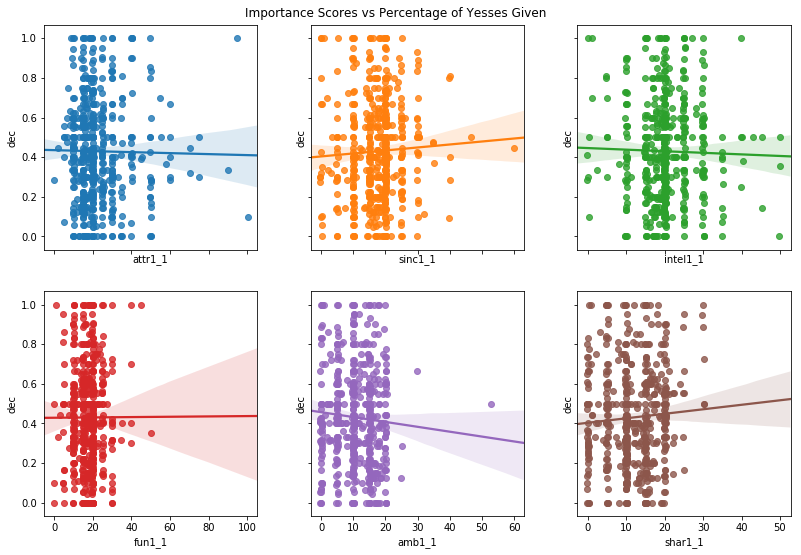

In [22]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['iid'])['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1','dec'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
fig.tight_layout()
fig.set_size_inches(12, 8)
sns.regplot(x=score_averages.attr1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax1)
sns.regplot(x=score_averages.sinc1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax2)
sns.regplot(x=score_averages.intel1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax3)
sns.regplot(x=score_averages.fun1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax4)
sns.regplot(x=score_averages.amb1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax5)
sns.regplot(x=score_averages.shar1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax6)
fig.suptitle('Importance Scores vs Percentage of Yesses Given')

plt.show()

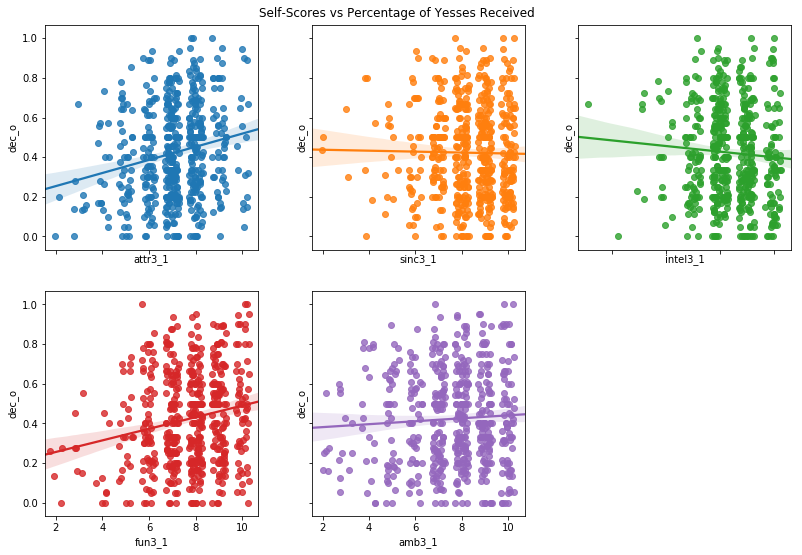

In [23]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['iid'])['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1','dec_o'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
fig.tight_layout()
fig.set_size_inches(12, 8)
sns.regplot(x=score_averages.attr3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax1)
sns.regplot(x=score_averages.sinc3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax2)
sns.regplot(x=score_averages.intel3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax3)
sns.regplot(x=score_averages.fun3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax4)
sns.regplot(x=score_averages.amb3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax5)
plt.delaxes(ax6)
fig.suptitle('Self-Scores vs Percentage of Yesses Received')

plt.show()

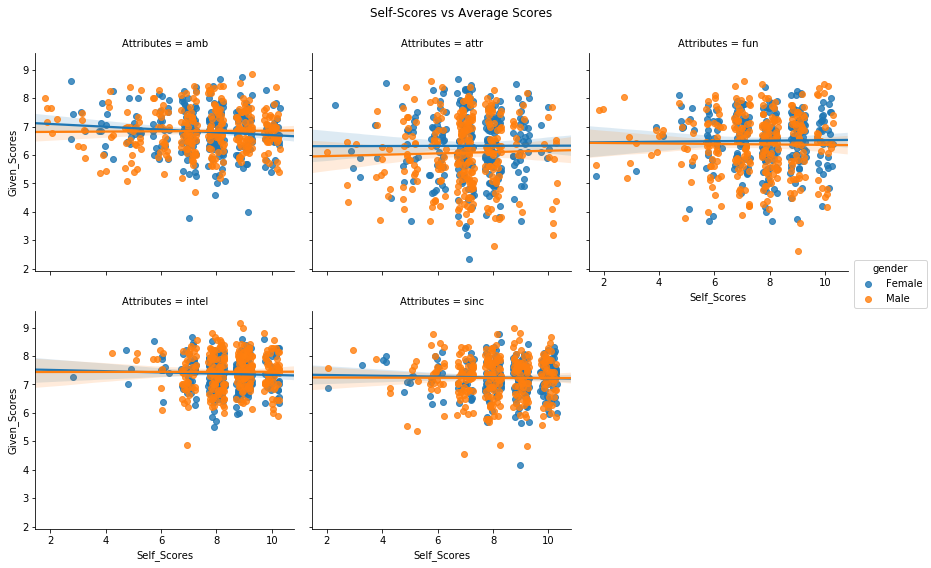

In [24]:
# Getting a dataframe of self-scores to be used for graphing

self_scores = data.loc[:,['gender', 'attr3_1',
                                 'amb3_1','sinc3_1','intel3_1',
                                 'fun3_1']]
self_scores.columns = ['gender', 'attr','amb','sinc','intel','fun']
self_scores_pivot = pd.pivot_table(self_scores,index=["iid",'gender'])
self_scores_stacked = self_scores_pivot.stack()
self_scores_stacked.index.set_names('Attributes', level=len(self_scores_stacked.index.names)-1, inplace=True)
self_scores_stacked = self_scores_stacked.reset_index().rename(columns={0:'Self_Scores'})

# Getting a data frame of given scores used for graphing...

score_averages = speed_dating.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'dec','gender'].mean()
score_averages_pivot = pd.pivot_table(score_averages,index=["pid",'dec'])
score_averages_stacked = score_averages_pivot.stack()
score_averages_stacked.index.set_names('Attributes', level=len(score_averages_stacked.index.names)-1, inplace=True)
score_averages_stacked = score_averages_stacked.reset_index().rename(columns={0:'Given_Scores'})
score_averages_stacked.columns = ['iid', 'dec','Attributes','Given_Scores']

# Merging two data frames together based on 'iid' and 'Attributes' to be used for graphing

self_and_given_scores = pd.merge(self_scores_stacked, score_averages_stacked, how='inner', on=['iid','Attributes'], left_on=None, right_on=None,
         left_index=True, right_index=True)

g = sns.lmplot(x="Self_Scores", y="Given_Scores", data=self_and_given_scores, hue='gender',
           col='Attributes',col_wrap=3, x_jitter=.3, size=4, aspect=1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Self-Scores vs Average Scores')
plt.show()

In [25]:
print('Gradient Boosting Classifiers\n')
speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec_o','attr3_1','amb3_1','sinc3_1','intel3_1',
                               'fun3_1','gender']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1','gender']]# taking the training data input 
train_y= train.dec_o# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1','gender']]# taking the training data input 
test_y= test.dec_o# This is output of our training data

pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print('Using Your Partner\'s Self-scores to predict giving a Yes or No:')
print("Percent Accuracy = {}\n".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))


speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec', 'prob','attr1_1','amb1_1','sinc1_1','intel1_1',
                               'fun1_1','shar1_1','gender']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
test_y= test.dec# This is output of our training data



pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print('Using Personal Attribute Importance scores to predict giving a Yes or No:')
print("Percent Accuracy = {}\n".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))

speed_dating2 = speed_dating_download.copy()


speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test

train, test = train_test_split(speed_dating1, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

prediction = clf.predict(test_X)
print('Using Attribute Scores to predict giving a Yes or No:\nPercent Accuracy: {}\n'.format(metrics.accuracy_score(prediction,test_y)))

Gradient Boosting Classifiers

Using Your Partner's Self-scores to predict giving a Yes or No:
Percent Accuracy = 0.6023368251410153

Using Personal Attribute Importance scores to predict giving a Yes or No:
Percent Accuracy = 0.6298157453936348

Using Attribute Scores to predict giving a Yes or No:
Percent Accuracy: 0.7735042735042735



Random Forrest Classifier Accuracy = 0.8015640273704789
Gradient Boosting Classifier Accuracy = 0.7986314760508308


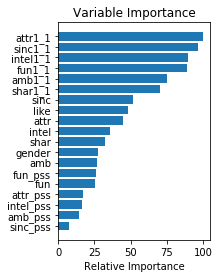

1_1 - Attribute Importance
_pss - Partner's Self Score


In [26]:
speed_dating2 = speed_dating_download.copy()

self_scores = speed_dating2[['iid','pid','attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]
speed_to_merge = speed_dating2[['iid','pid','attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1',
                                'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                                'dec','gender']]
self_scores.columns = ['pid', 'iid','attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss']
self_scores.head()

merged =  pd.merge(self_scores, speed_to_merge, on=['iid', 'pid'])
merged = merged.dropna()

speed_dating2 = merged.sample(frac=1)

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss','attr1_1',
                 'amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss',
               'attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1',
               'shar1_1','gender']]# taking the training data input 
test_y = test.dec# This is output of our training data



model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)

prediction = model.predict(test_X)

print('Random Forrest Classifier Accuracy = {}'.format(metrics.accuracy_score(prediction,test_y)))

pred_y = clf.predict(test_X)

# Accuracy table.
# table = pd.crosstab(test_y, pred_y)

print("Gradient Boosting Classifier Accuracy = {}".format(metrics.accuracy_score(pred_y,test_y)))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

print('1_1 - Attribute Importance\n_pss - Partner\'s Self Score')

Conclusion: 
- There isn't much you can do to make yourself more 'marketable'.
- The best you can do is to be as aware as possible of when somebody else authentically likes you and just go from there.

Ideas for Future Models:

- Race- Paper already written by Fisher and Iyengar in [Racial Preferences in Dating](http://faculty.chicagobooth.edu/emir.kamenica/documents/racialpreferences.pdf)
- Dating Habits
- Financial Status
- Location
- Age differences

References

Fisher, R. & Iyengar, S. (2004). Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment \[Data file and code book\]. Retrieved from http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

Montoya, A. (2015). Speed Dating Experiment
What attributes influence the selection of a romantic partner?. Retrieved from https://www.kaggle.com/annavictoria/speed-dating-experiment